In [99]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [100]:
!git clone https://github.com/mahshooq-karayil/data-science.git

fatal: destination path 'data-science' already exists and is not an empty directory.


In [101]:
df = pd.read_csv('/content/data-science/crop-recommendation/data.csv')

In [102]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [104]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [105]:
df[df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [106]:
df.N.value_counts()

22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: N, Length: 137, dtype: int64

In [107]:
df.N.isnull().sum()

0

In [108]:
df.P.value_counts()

60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: P, Length: 117, dtype: int64

In [109]:
df.P.isnull().sum()

0

In [110]:
df.K.value_counts()

17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64

In [111]:
df.K.isnull().sum()

0

In [112]:
df.temperature.value_counts()

20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: temperature, Length: 2200, dtype: int64

In [113]:
df.temperature.isnull().sum()

0

In [114]:
df.humidity.value_counts()

82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: humidity, Length: 2200, dtype: int64

In [115]:
df.humidity.isnull().sum()

0

In [116]:
df.ph.value_counts()

6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: ph, Length: 2200, dtype: int64

In [117]:
df.ph.isnull().sum()

0

In [118]:
df.rainfall.value_counts()

202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: rainfall, Length: 2200, dtype: int64

In [119]:
df.rainfall.isnull().sum()

0

<Axes: >

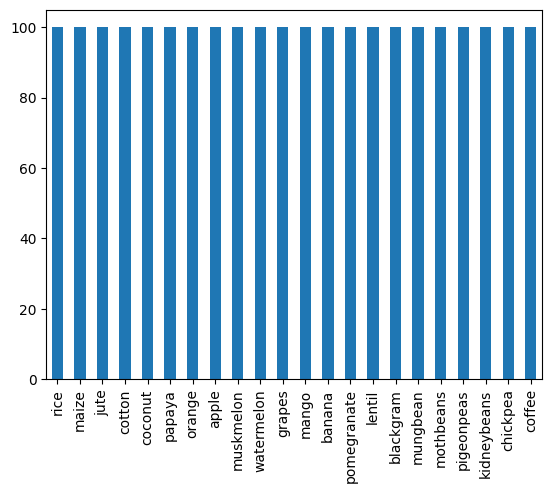

In [120]:
df.label.value_counts().plot.bar()

In [121]:
df.label.isnull().sum()

0

#**EDA**

##**Numerical Features : Univariate Analysis**

In [122]:
num = df.select_dtypes(include = np.number)

In [123]:
num

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


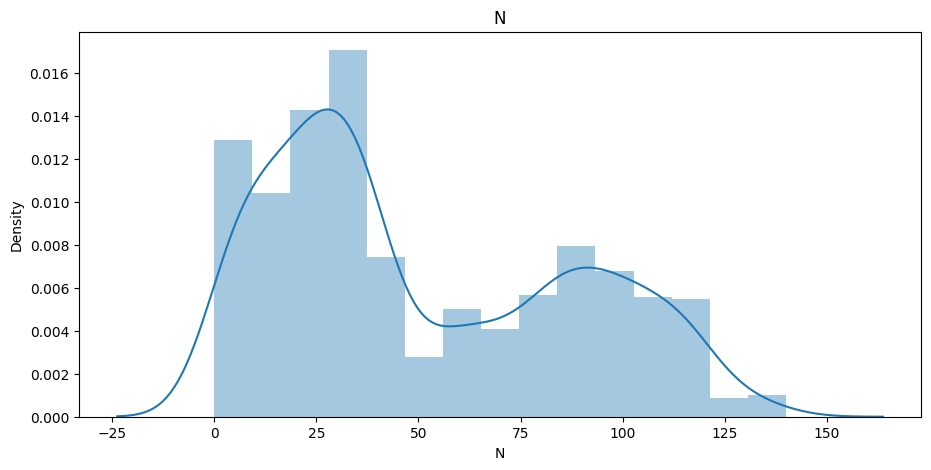

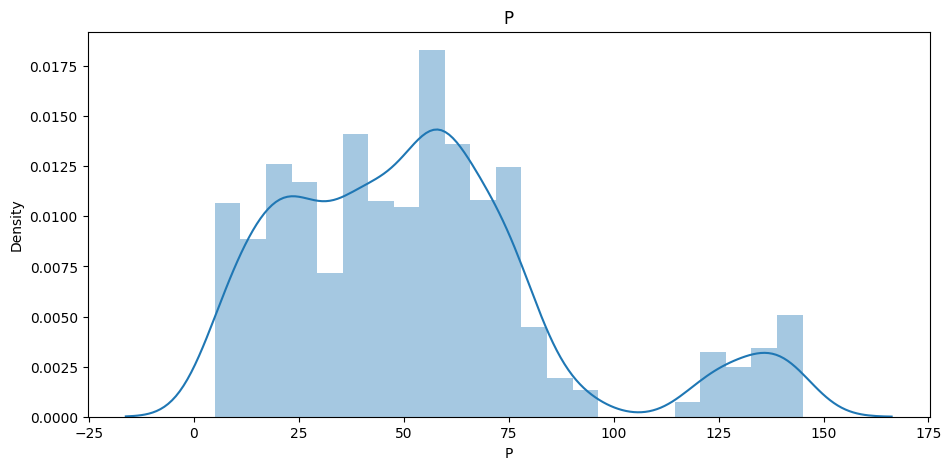

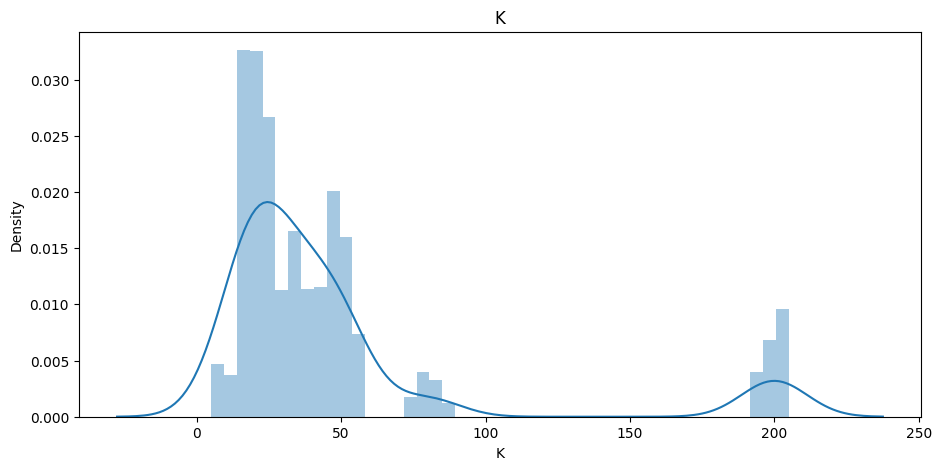

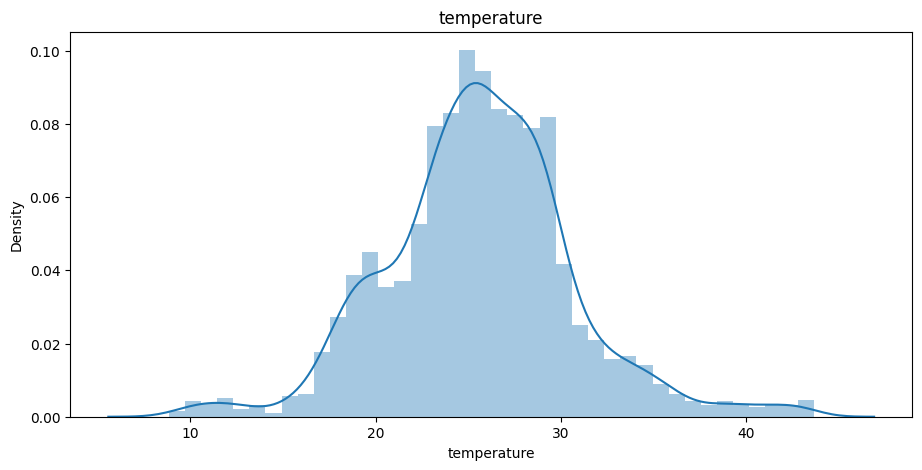

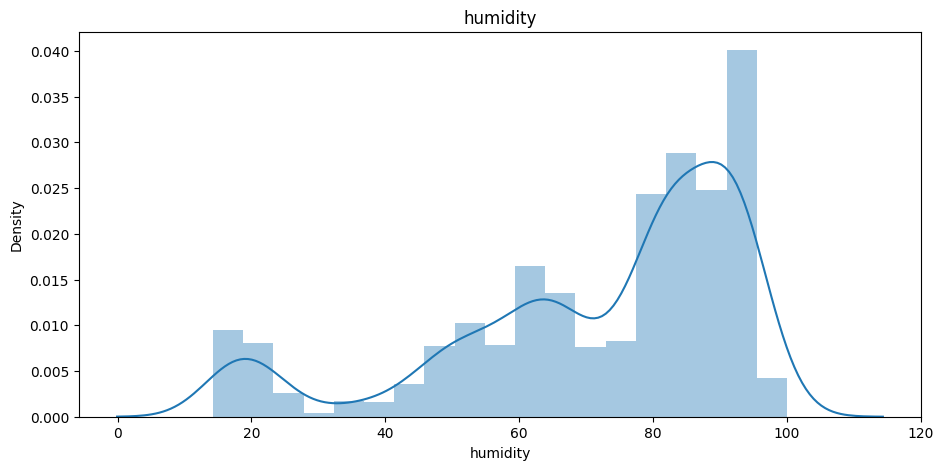

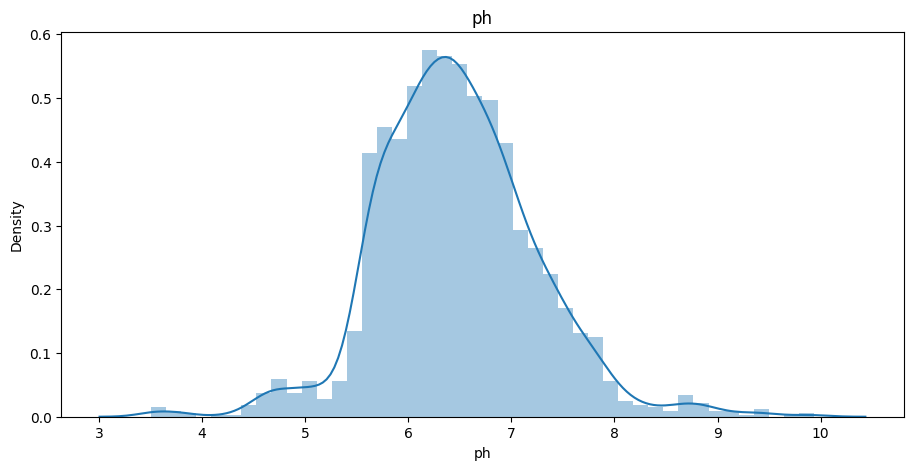

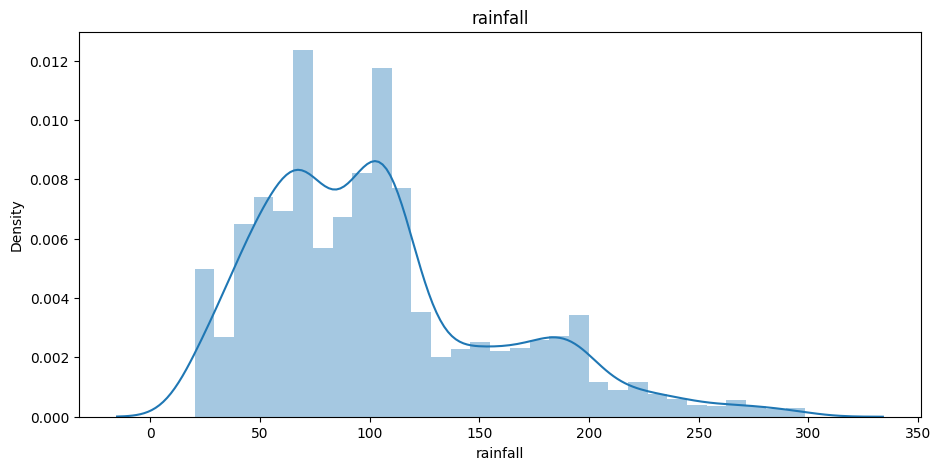

In [124]:
for col in num:
  plt.figure(figsize=(50,5))
  plt.subplot(141)
  sb.distplot(df[col],kde = True)
  plt.title(col)

From the dist plots it is clear that features like N, P, K and rainfall are skewed to the right and humidity is skewed to the left. This might be due to the presence of outliers in this features.

#**Handling Outliers**





##**N**

<Axes: >

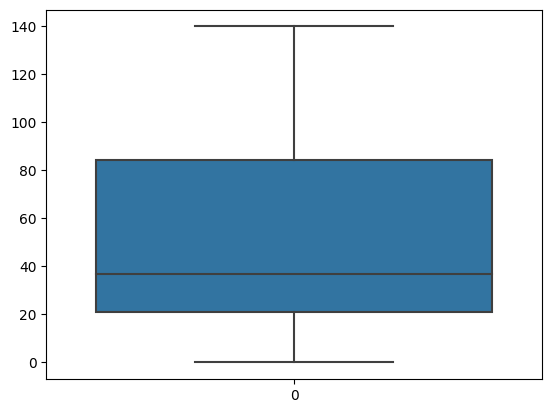

In [125]:
sb.boxplot(df['N'])

In [126]:
q1 = np.percentile(df['N'],25)
q3 = np.percentile(df['N'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: -73.875   upper: 179.125


In [127]:
df.N.clip(lower,upper,inplace = True)

<Axes: >

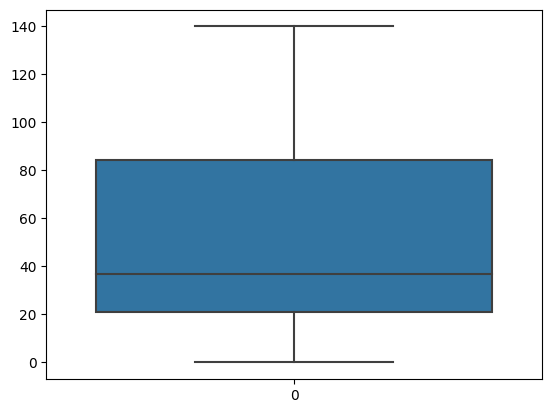

In [128]:
sb.boxplot(df['N'])

##**P**

<Axes: >

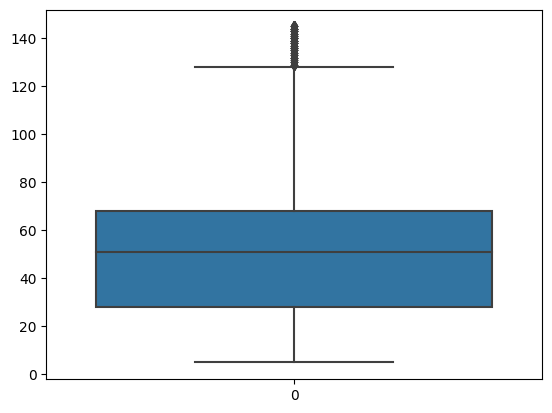

In [129]:
sb.boxplot(df['P'])

In [130]:
q1 = np.percentile(df['P'],25)
q3 = np.percentile(df['P'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: -32.0   upper: 128.0


In [131]:
df.P.clip(lower,upper,inplace = True)

<Axes: >

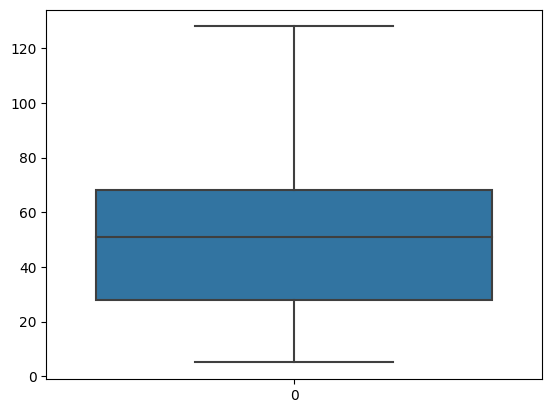

In [132]:
sb.boxplot(df['P'])

##**K**

<Axes: >

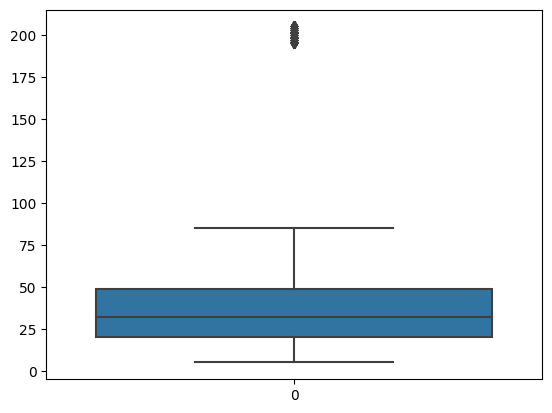

In [133]:
sb.boxplot(df['K'])

In [134]:
q1 = np.percentile(df['K'],25)
q3 = np.percentile(df['K'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: -23.5   upper: 92.5


In [135]:
df.K.clip(lower,upper,inplace = True)

<Axes: >

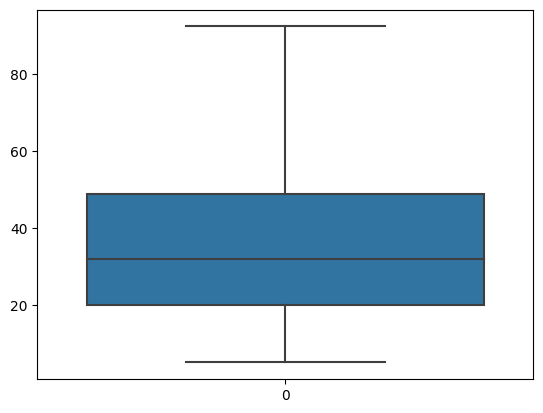

In [136]:
sb.boxplot(df['K'])

##**temperature**

<Axes: >

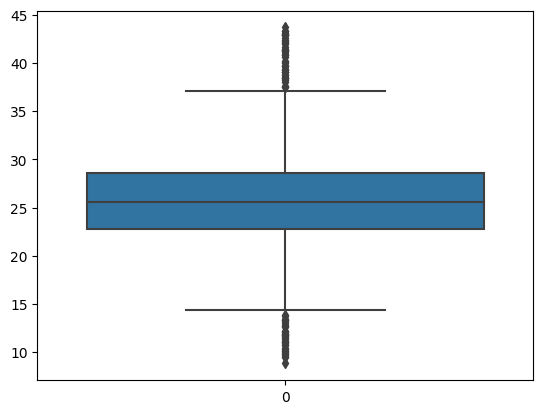

In [137]:
sb.boxplot(df['temperature'])

In [138]:
q1 = np.percentile(df['temperature'],25)
q3 = np.percentile(df['temperature'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: 14.080955682499999   upper: 37.2500728825


In [139]:
df.temperature.clip(lower,upper,inplace = True)

<Axes: >

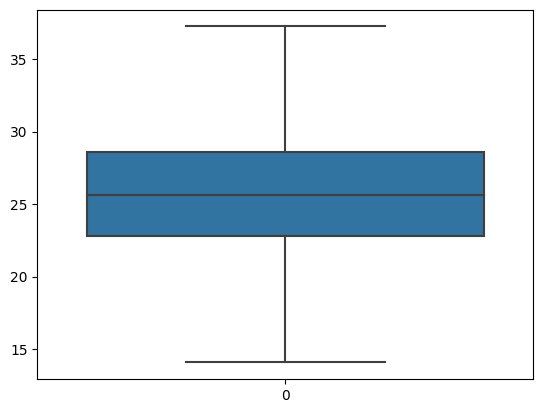

In [140]:
sb.boxplot(df['temperature'])

##**humidity**

<Axes: >

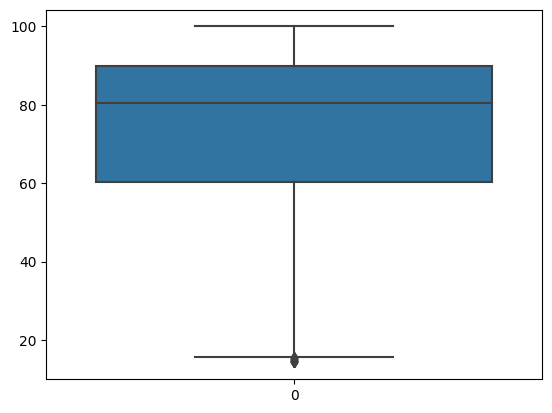

In [141]:
sb.boxplot(df['humidity'])

In [142]:
q1 = np.percentile(df['humidity'],25)
q3 = np.percentile(df['humidity'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: 15.731725873750001   upper: 134.47899768374998


In [143]:
df.humidity.clip(lower,upper,inplace = True)

<Axes: >

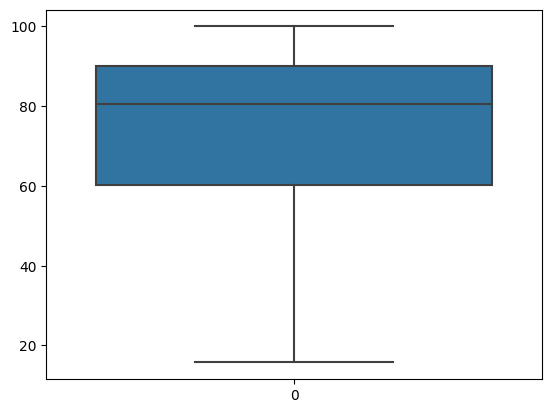

In [144]:
sb.boxplot(df['humidity'])

##**ph**

<Axes: >

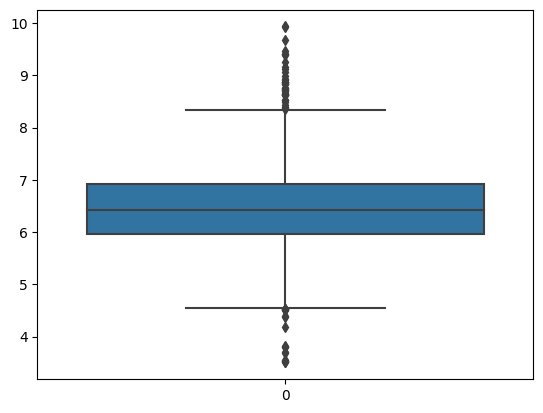

In [145]:
sb.boxplot(df['ph'])

In [146]:
q1 = np.percentile(df['ph'],25)
q3 = np.percentile(df['ph'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower,"  upper:",upper)

lower: 4.543768066249998   upper: 8.351567354250005


In [147]:
df.ph.clip(lower,upper,inplace = True)

<Axes: >

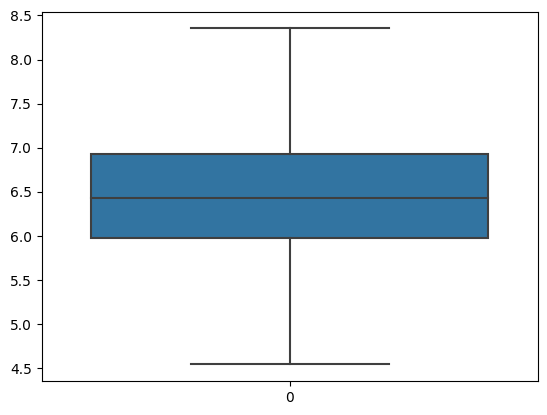

In [148]:
sb.boxplot(df['ph'])

##**rainfall**

<Axes: >

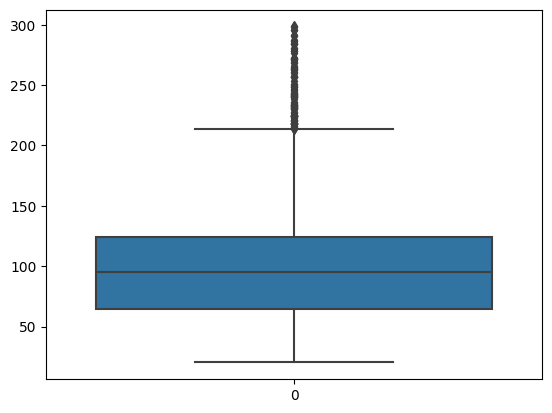

In [149]:
sb.boxplot(df['rainfall'])

In [150]:
q1 = np.percentile(df['rainfall'],25)
q3 = np.percentile(df['rainfall'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("upper:",upper,"  lower:",lower)

upper: 213.84124050000003   lower: -25.022046700000033


In [151]:
df.rainfall.clip(lower,upper,inplace = True)

<Axes: >

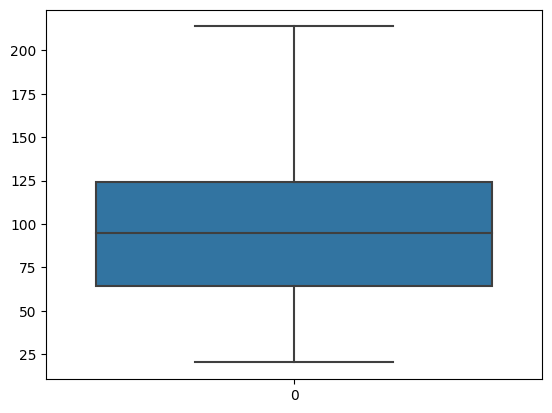

In [152]:
sb.boxplot(df['rainfall'])

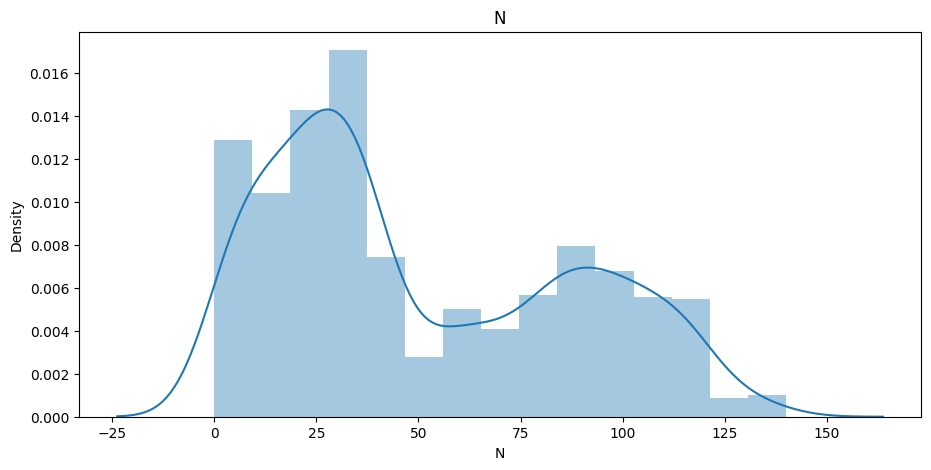

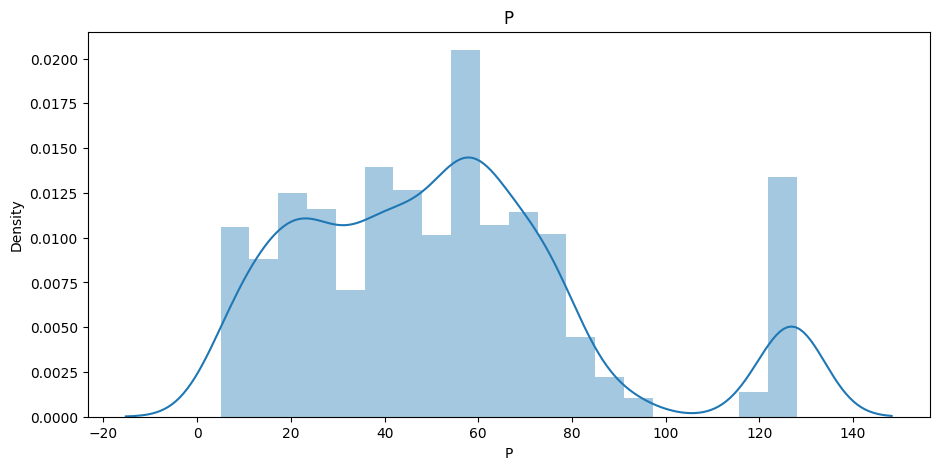

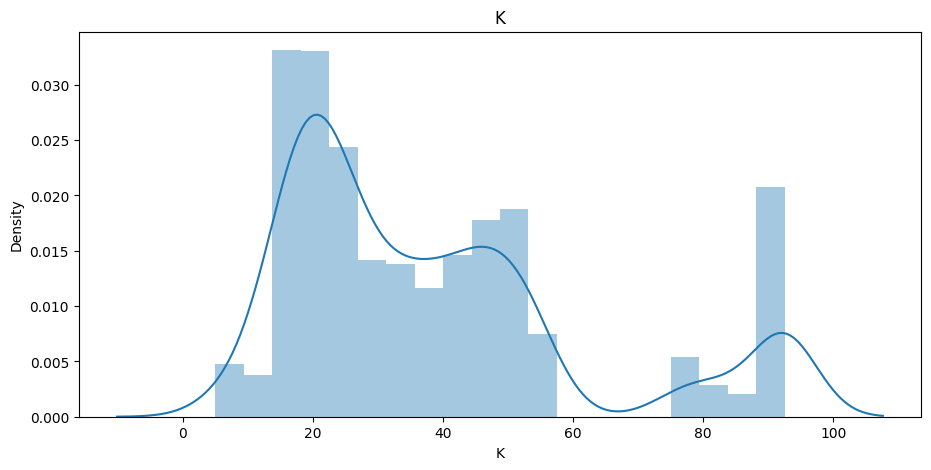

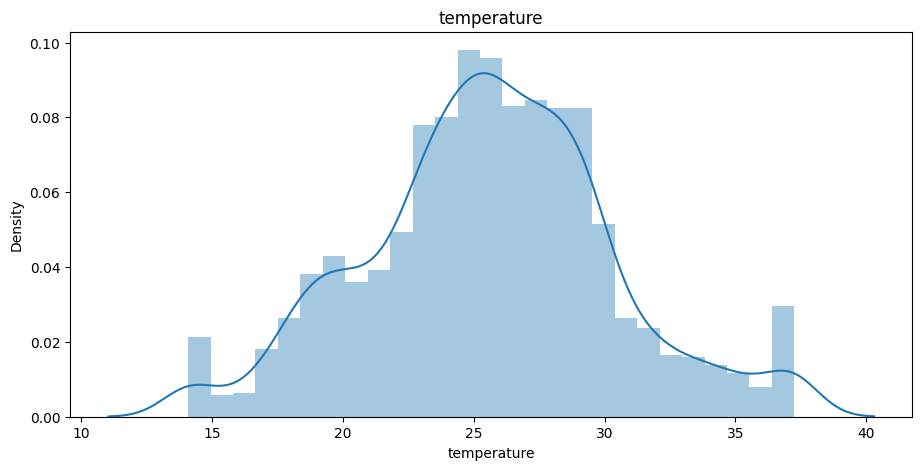

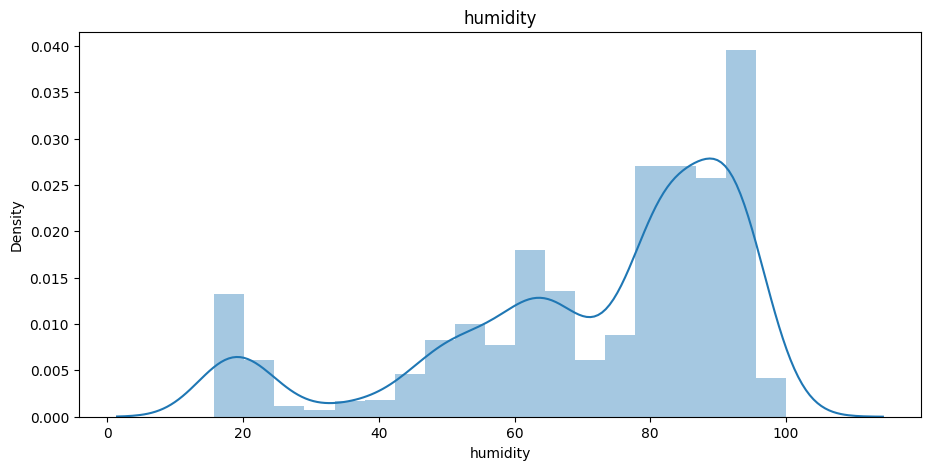

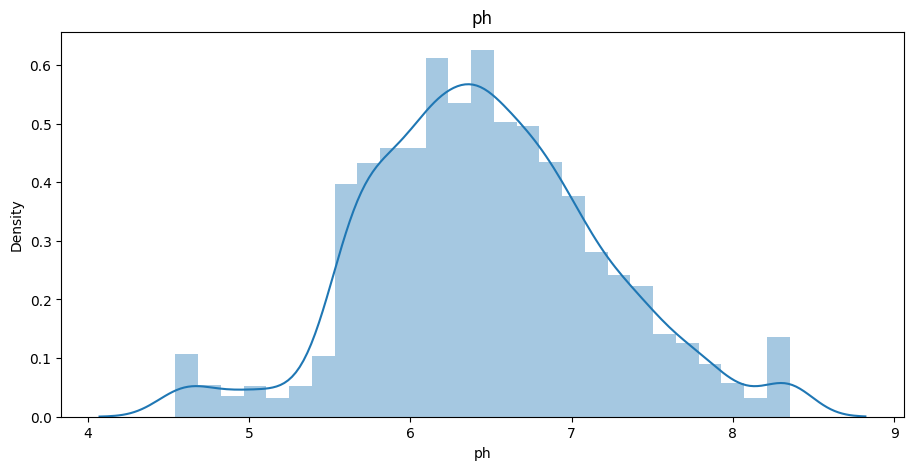

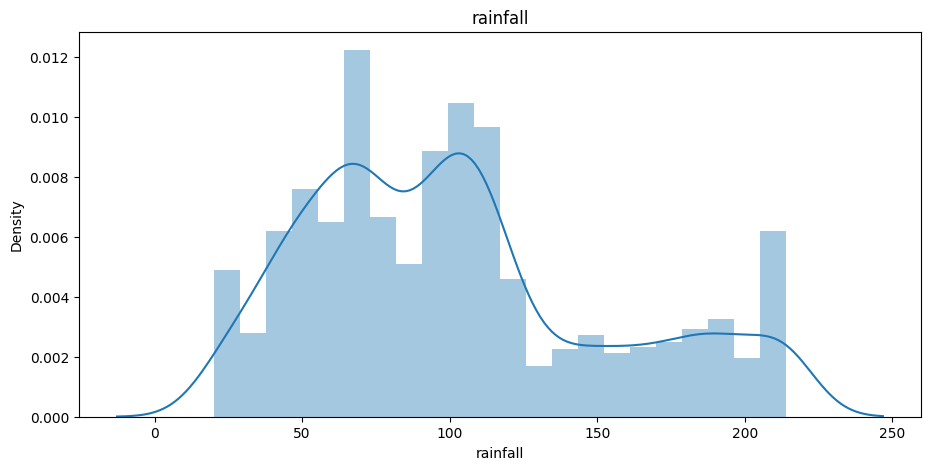

In [153]:
num = df.select_dtypes(include = np.number)
for col in num:
  plt.figure(figsize=(50,5))
  plt.subplot(141)
  sb.distplot(df[col],kde = True)
  plt.title(col)

In [154]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [155]:
print(X[0])

[ 90.          42.          43.          20.87974371  82.00274423
   6.50298529 202.9355362 ]


# **Feature And Target Selection**

In [156]:
X = df.drop('label',axis = 1)
y = df['label']

# **Label Encoding**

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# **Splitting**

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

# **ML Models**

## Decision Tree classification

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth':[9,10,11,12] # try with 3,4
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
dt = gsearch.best_estimator_
print(dt.criterion)
print(dt.min_samples_split)
print(dt.max_depth)

entropy
3
12


In [160]:
y_pred=dt.predict(X_test)
dt.score(X_test, y_test)

0.9795454545454545

## Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.9954545454545455

## **Standard Scaling**

In [163]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## K-NN Classification

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [165]:
train_accuracy =[]
test_accuracy =[]
for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    y_pred= knn.predict(X_test)
    ac=accuracy_score(y_pred,y_test)
    test_accuracy.append(ac)

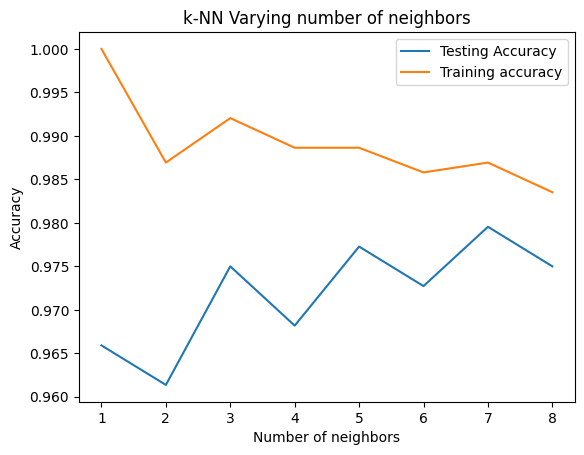

In [166]:
neighbors = np.arange(1,9)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [167]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9795454545454545

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.84      0.96      0.90        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       0.93      1.00      0.96        26
          13       1.00      0.84      0.91        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [169]:
print(knn.score(X_test,y_test))

0.9795454545454545


## Naive-Bayes Classification

In [170]:
from sklearn.naive_bayes import GaussianNB

In [171]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, y_pred)
print (cm)


[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [173]:
print('f1 score:',f1_score(y_test, y_pred,average='micro'))
print('accuracy:',accuracy_score(y_test, y_pred))

f1 score: 0.990909090909091
accuracy: 0.990909090909091


## SVC

In [174]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

<Axes: >

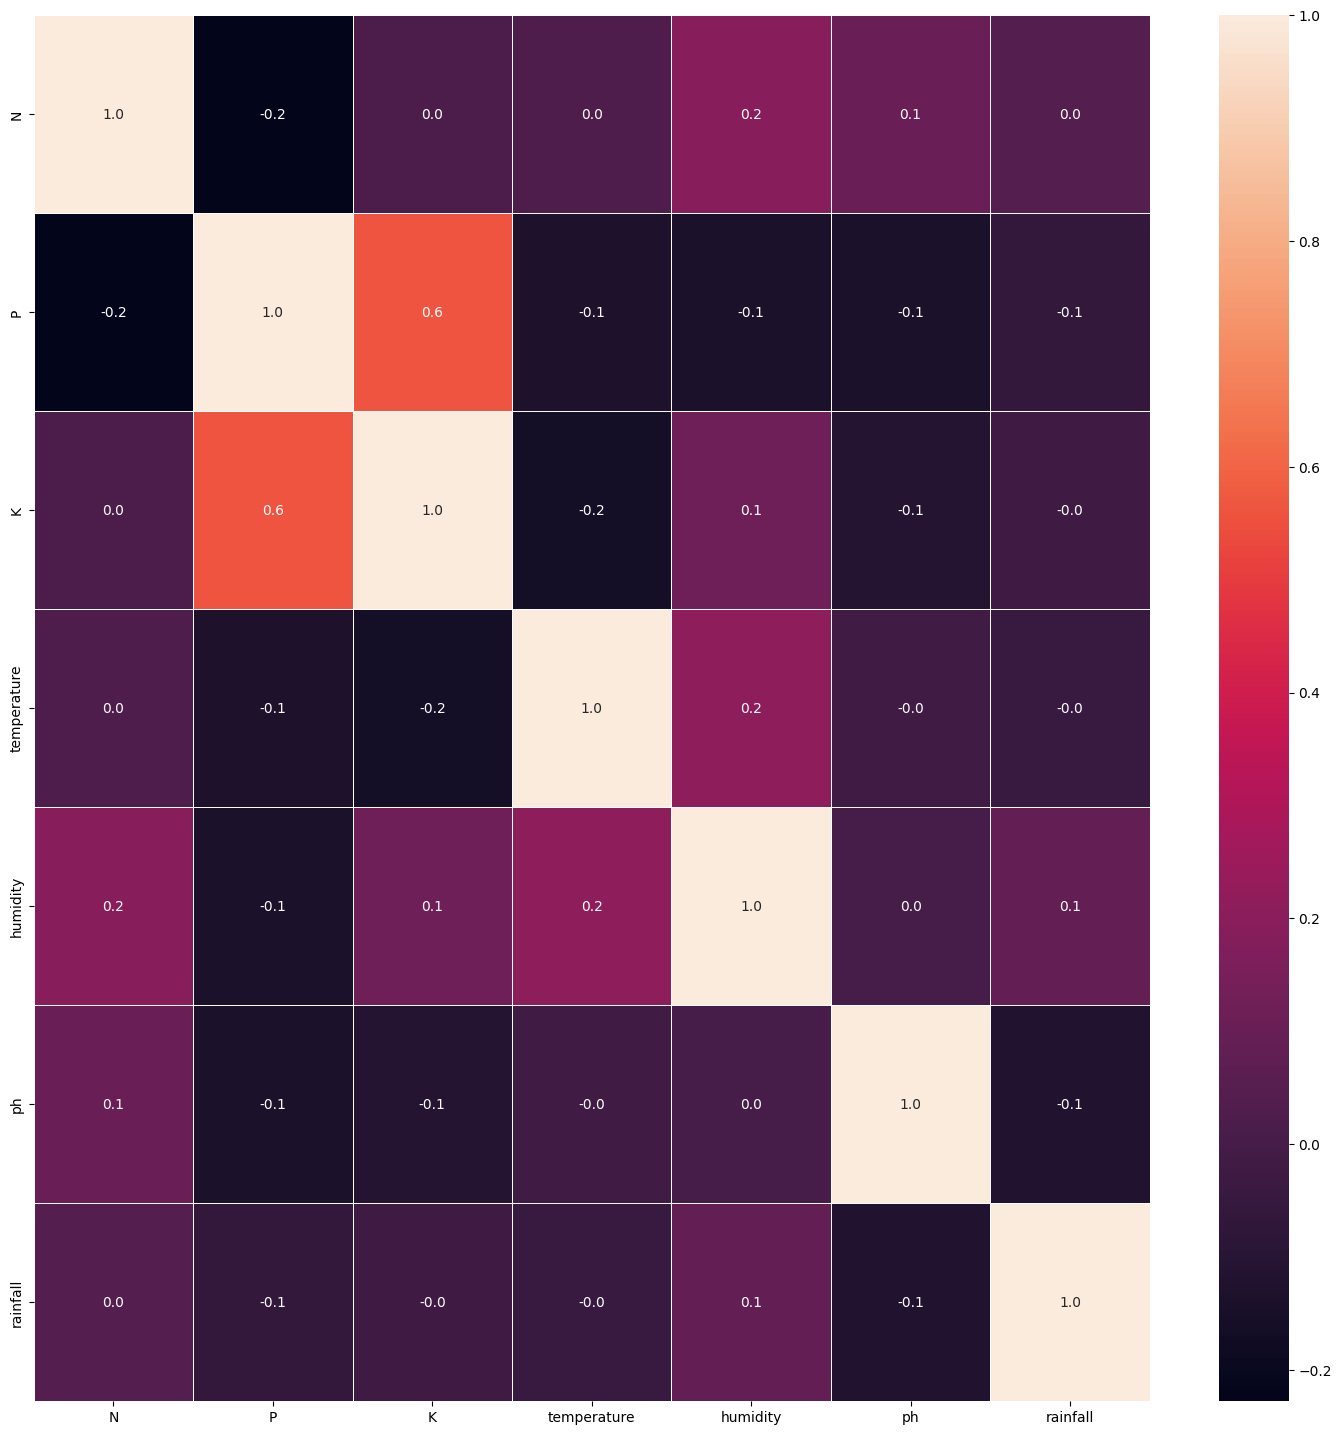

In [175]:
f,ax = plt.subplots(figsize=(18, 18))
sb.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [176]:
print(y[30:40])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print(y[:100])

[20 20 20 20 20 20 20 20 20 20]
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20]


In [177]:
classifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:")
print(cm)

Confusion matrix is:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

In [178]:
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


## Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9522727272727273


## XG Boost

In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [211]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xg = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  xg.fit(X_train, y_train)
  print("Learning rate : ", lr," Train score : ", xg.score(X_train,y_train)," Cross-Val score : ", np.mean(cross_val_score(xg, X_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.9971590909090909  Cross-Val score :  0.9227272727272726
Learning rate :  0.02  Train score :  0.9988636363636364  Cross-Val score :  0.9318181818181817
Learning rate :  0.03  Train score :  1.0  Cross-Val score :  0.934090909090909
Learning rate :  0.04  Train score :  1.0  Cross-Val score :  0.9409090909090908
Learning rate :  0.05  Train score :  1.0  Cross-Val score :  0.9409090909090908
Learning rate :  0.1  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.11  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.12  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.13  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.14  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.15  Train score :  1.0  Cross-Val score :  0.9386363636363635
Learning rate :  0.2  Train score :  1.0  Cross-Val score :  0.9386363636363635
L

Learning rate = 0.04 gives best cross-val score of 0.9409

In [202]:
xg = xgb.XGBClassifier(learning_rate =0.04, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred = xg.predict_proba(X_test)

In [203]:
print("XG Boost Score: ",xg.score(X_test,y_test))

XG Boost Score:  0.9931818181818182


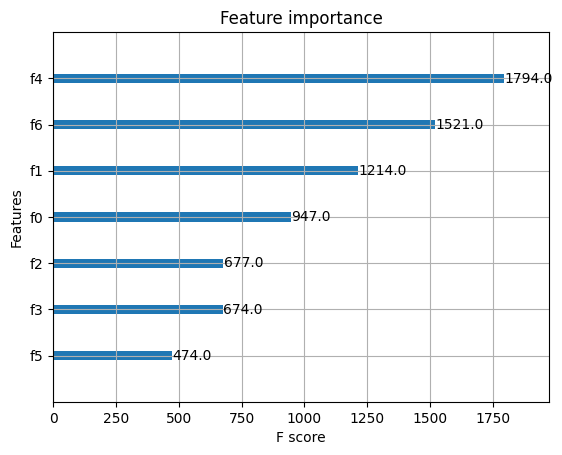

In [223]:
from xgboost import plot_importance
plot_importance(xg)
plt.show()

In [224]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

f0  - N

f1  - P

f2  - K

f3  - temperature

f4  - humidity

f5  - ph

f6  - rainfall

f7  - label

## **Conclusions**
* The score of respective ML models are as follows;

  *   Decision Tree Classification: 0.9795

  *   Random Forest: 0.9954

  *   KNN: 0.9795

  *   Naive-Bayes Classification: 0.9909

  *   SVC: 0.9818

  *   Logistic Regression: 0.9522
  
  *   XG Boost Score:  0.9931

*  **Random Forest Classification** gives a score of **99.54%**.

* The top features which affects the crop recommendation:

  * Humidity

  * Rainfall


